<a href="https://colab.research.google.com/github/SamDewriter/week7-CausalGraph/blob/main/CausalNex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q condacolab

In [ ]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:39
🔁 Restarting kernel...


In [ ]:
!conda install pygraphviz

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pygraphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    atk-1.0-2.36.0             |       h3371d22_4         560 KB  conda-forge
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    cairo-1.16.0               |    h6cf1ce9_1008         1.5 MB  conda-forge
    certifi-2021.5.30          |   py37h89c1867_0         141 KB  conda-forge
    conda-4.10.3               |   py37h89c1867_0         3.1 MB  conda-forge
    expat-2.4.1                |       h9c3ff4c_0         182 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    font-ttf-s

In [ ]:
!pip install causalnex

In [ ]:
!pip install dowhy

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import dowhy
from dowhy import CausalModel
import dowhy.datasets, dowhy.plotter

In [19]:
df = pd.read_csv('data.csv')

In [20]:
causal_df = df.drop(['id', 'Unnamed: 32'], axis=1).copy()

In [21]:
d = {'B':0, 'M':1}
causal_df['diagnosis'] = causal_df['diagnosis'].map(d)

In [22]:
causal_df['low_radius'] = causal_df['radius_mean'].apply(lambda x: True if x < 18 else False)

In [68]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(causal_df, random_state=20, test_size=.2)

In [69]:
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
from causalnex.structure.notears import from_pandas_lasso
sm = from_pandas(train_df.iloc[:, :12], tabu_parent_nodes=['diagnosis'],)

/usr/local/lib/python3.7/site-packages/causalnex/structure/notears.py:395: RuntimeWarning: overflow encountered in double_scalars
  return loss + 0.5 * rho * h * h + alpha * h
/usr/local/lib/python3.7/site-packages/causalnex/structure/notears.py:411: RuntimeWarning: overflow encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
/usr/local/lib/python3.7/site-packages/causalnex/structure/notears.py:411: RuntimeWarning: invalid value encountered in multiply
  obj_grad = loss_grad + (rho * (np.trace(E) - d) + alpha) * E.T * W * 2
/usr/local/lib/python3.7/site-packages/causalnex/structure/notears.py:440: UserWarning: Failed to converge. Consider increasing max_iter.
  warnings.warn("Failed to converge. Consider increasing max_iter.")


In [70]:
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Image
def vis_sm(sm):
  viz = plot_structure(
      sm,
      graph_attributes={"scale": "2.0", 'size': 3.0},
      all_node_attributes=NODE_STYLE.WEAK,
      all_edge_attributes=EDGE_STYLE.WEAK)
  return Image(viz.draw(format='png'))

/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


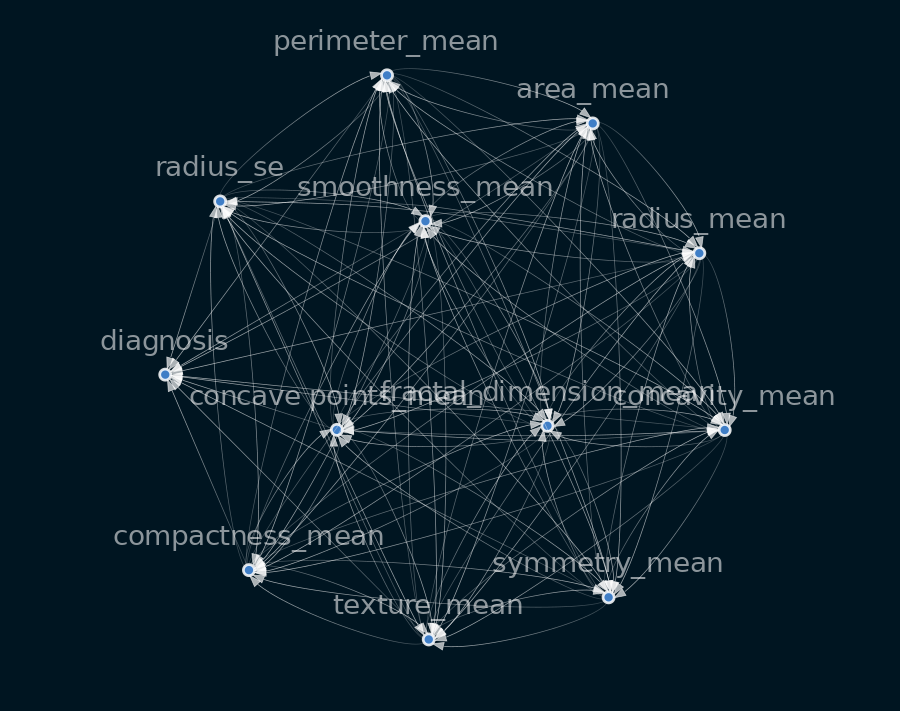

In [71]:
vis_sm(sm)

/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


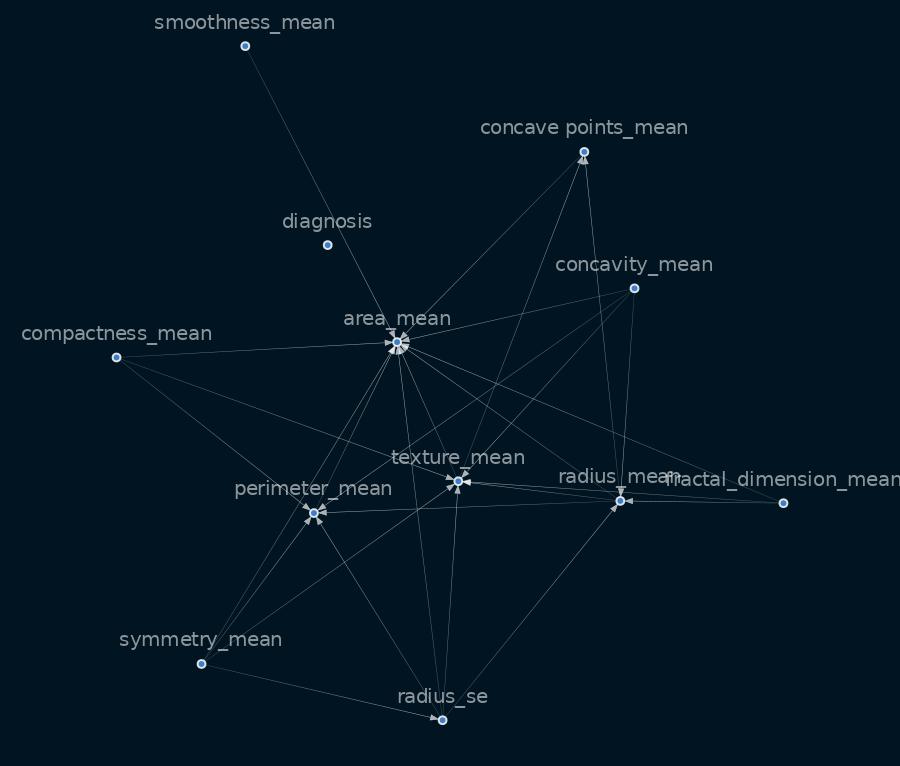

In [72]:
sm.remove_edges_below_threshold(0.9)
vis_sm(sm)

In [73]:
# 50%
causal_selected = train_df.iloc[:, :10]
portion = int(causal_selected.shape[0] *.5)
x_portion = causal_selected.head(portion)

In [74]:
%%time
sm1 = from_pandas_lasso(x_portion,
                       tabu_parent_nodes=['diagnosis'],
                       w_threshold=0.3,
                       beta=0.8)
sm1 = sm1.get_largest_subgraph()
vis_sm(sm1)

CPU times: user 37.3 s, sys: 27.6 s, total: 1min 4s
Wall time: 33.2 s


/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


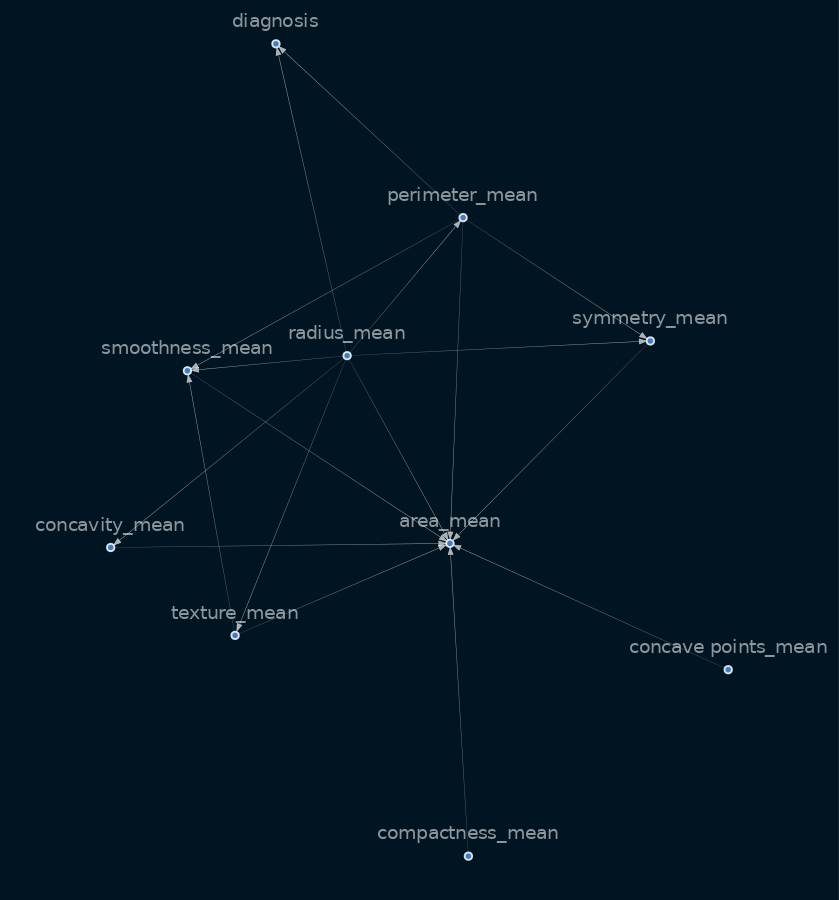

In [75]:
vis_sm(sm1)

In [76]:
portion = int(causal_selected.shape[0] *.6)
x_portion = causal_selected.head(portion)

In [77]:
%%time
sm2 = from_pandas_lasso(x_portion,
                       tabu_parent_nodes=['diagnosis'],
                       w_threshold=0.3,
                       beta=0.8)
sm2 = sm2.get_largest_subgraph()

CPU times: user 1min 21s, sys: 59.6 s, total: 2min 20s
Wall time: 1min 11s


/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


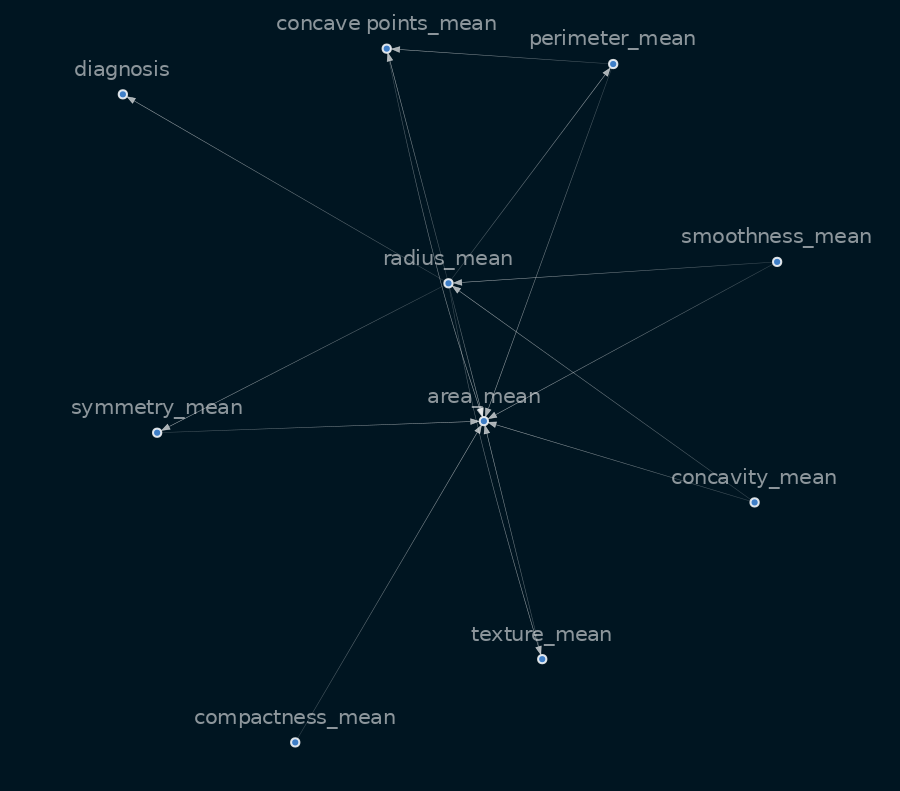

In [78]:
vis_sm(sm2)

In [79]:
portion = int(causal_selected.shape[0] *.7)
x_portion = causal_selected.head(portion)

In [80]:
%%time
sm3 = from_pandas_lasso(x_portion,
                       tabu_parent_nodes=['diagnosis'],
                       w_threshold=0.3,
                       beta=0.8)
sm3 = sm3.get_largest_subgraph()

CPU times: user 49.6 s, sys: 36.6 s, total: 1min 26s
Wall time: 44 s


/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


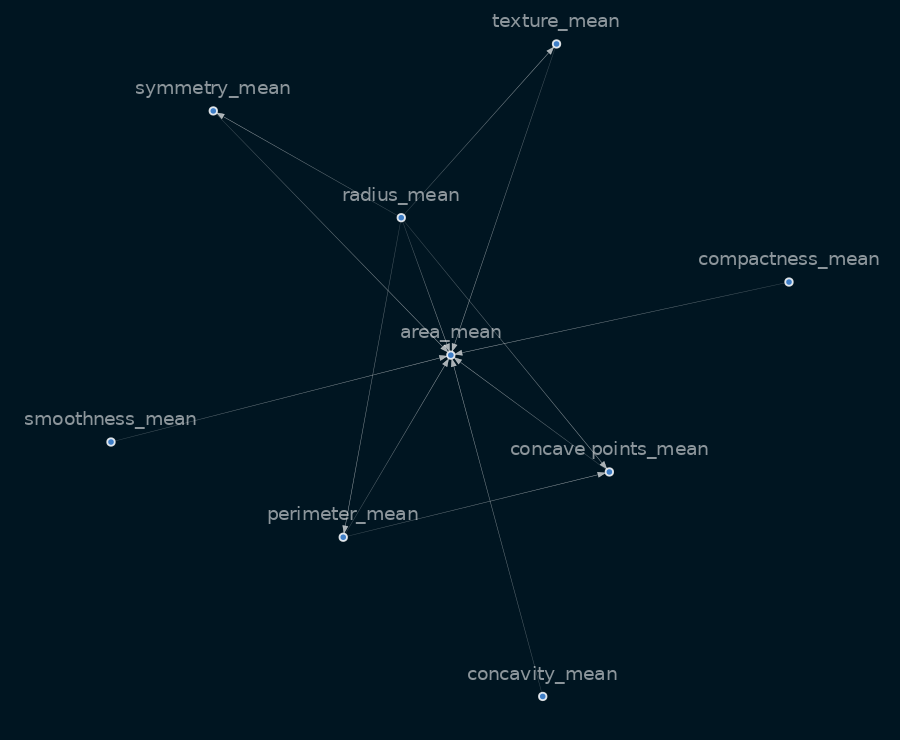

In [81]:
vis_sm(sm3)

In [82]:
portion = int(causal_selected.shape[0] *.8)
x_portion = causal_selected.head(portion)

In [83]:
%%time
sm4 = from_pandas_lasso(x_portion,
                       tabu_parent_nodes=['diagnosis'],
                       w_threshold=0.3,
                       beta=0.8)
sm4 = sm4.get_largest_subgraph()

CPU times: user 57.6 s, sys: 42.2 s, total: 1min 39s
Wall time: 51 s


/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


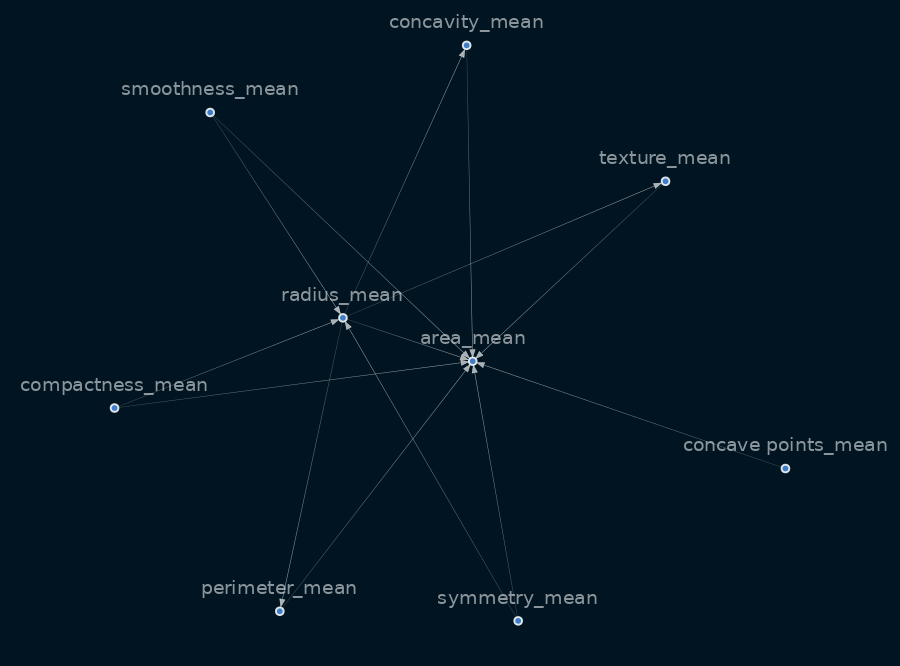

In [84]:
vis_sm(sm4)

In [85]:
portion = int(causal_selected.shape[0] *.9)
x_portion = causal_selected.head(portion)

In [86]:
%%time
sm5 = from_pandas_lasso(x_portion,
                       tabu_parent_nodes=['diagnosis'],
                       w_threshold=0.3,
                       beta=0.8)
sm5 = sm5.get_largest_subgraph()

CPU times: user 40.9 s, sys: 29.9 s, total: 1min 10s
Wall time: 36.1 s


/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


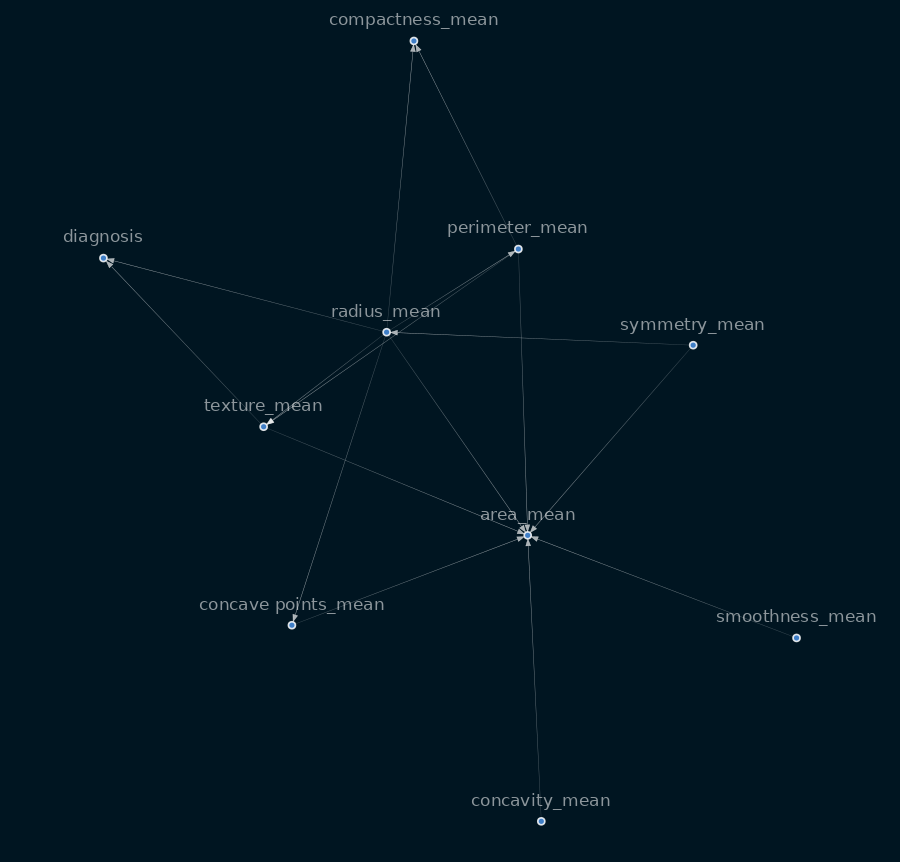

In [87]:
vis_sm(sm5)

In [88]:
a_sm = np.array(sm1.edges)
b_sm = np.array(sm2.edges)

In [89]:
from sklearn.metrics import jaccard_score
jaccard_score(a_sm, b_sm, average='samples')

ValueError: ignored

In [103]:
# final graph
%%time
new_sm = from_pandas_lasso( causal_selected,
                        tabu_parent_nodes=['diagnosis'], 
                        w_threshold=0.3, 
                        beta=0.8)

CPU times: user 51 s, sys: 36.8 s, total: 1min 27s
Wall time: 44.8 s


/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


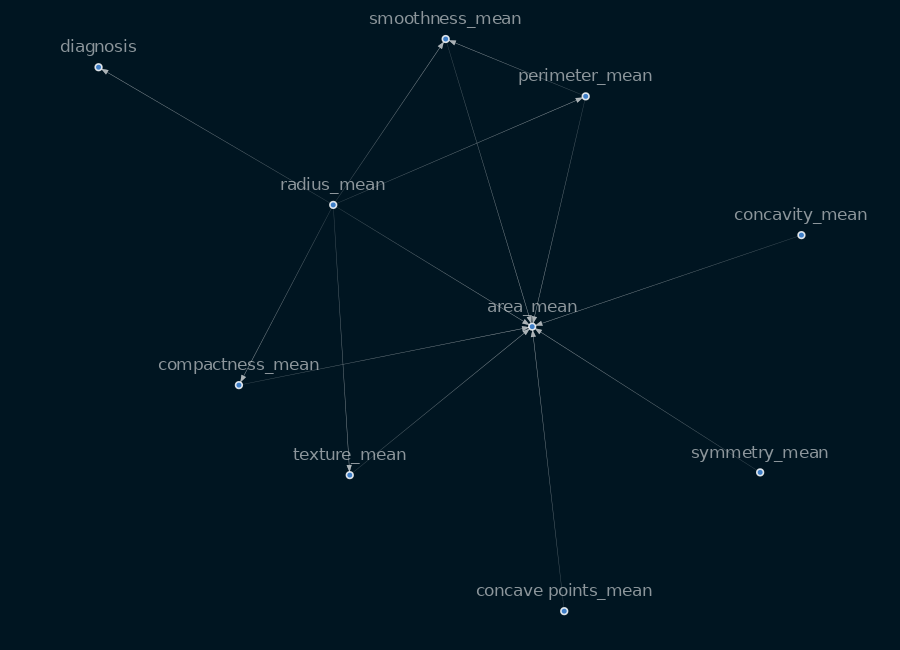

In [104]:
vis_sm(new_sm)

/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


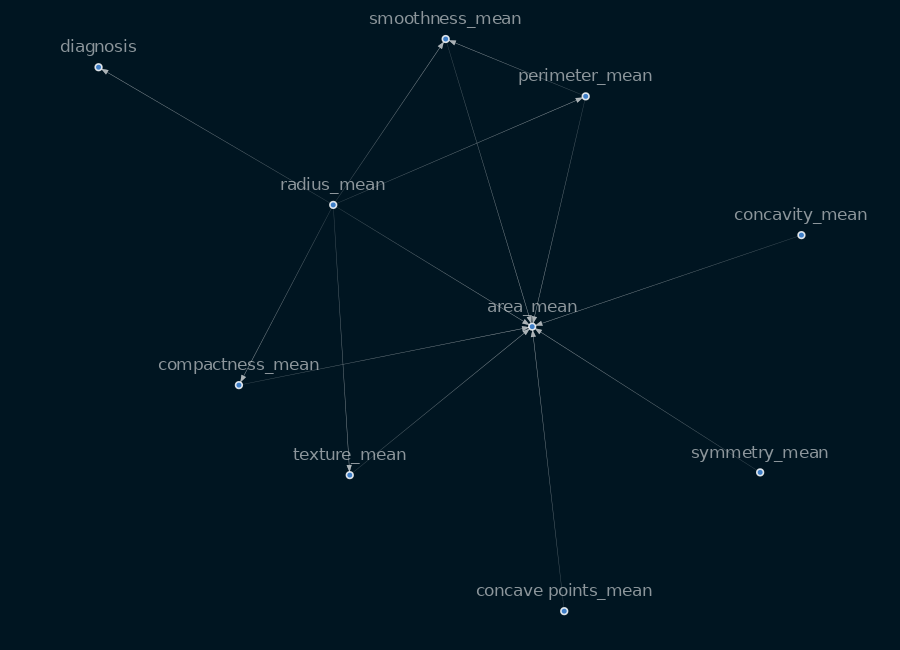

In [105]:
new_sm = new_sm.get_largest_subgraph()
vis_sm(new_sm)

/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


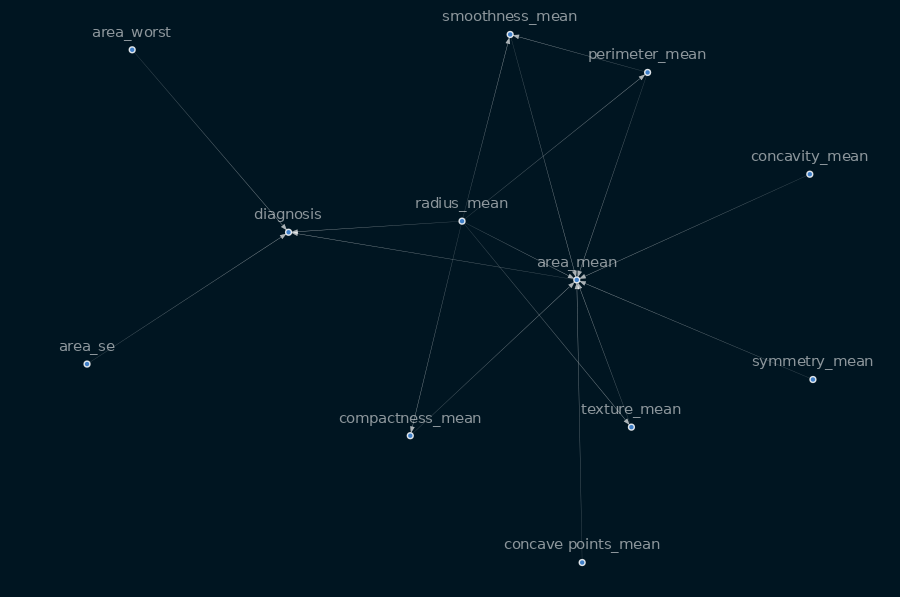

In [107]:
new_sm.add_edge("area_mean", "diagnosis")
new_sm.add_edge("area_se", "diagnosis")
new_sm.add_edge("area_worst", "diagnosis")
vis_sm(new_sm)

/usr/local/lib/python3.7/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


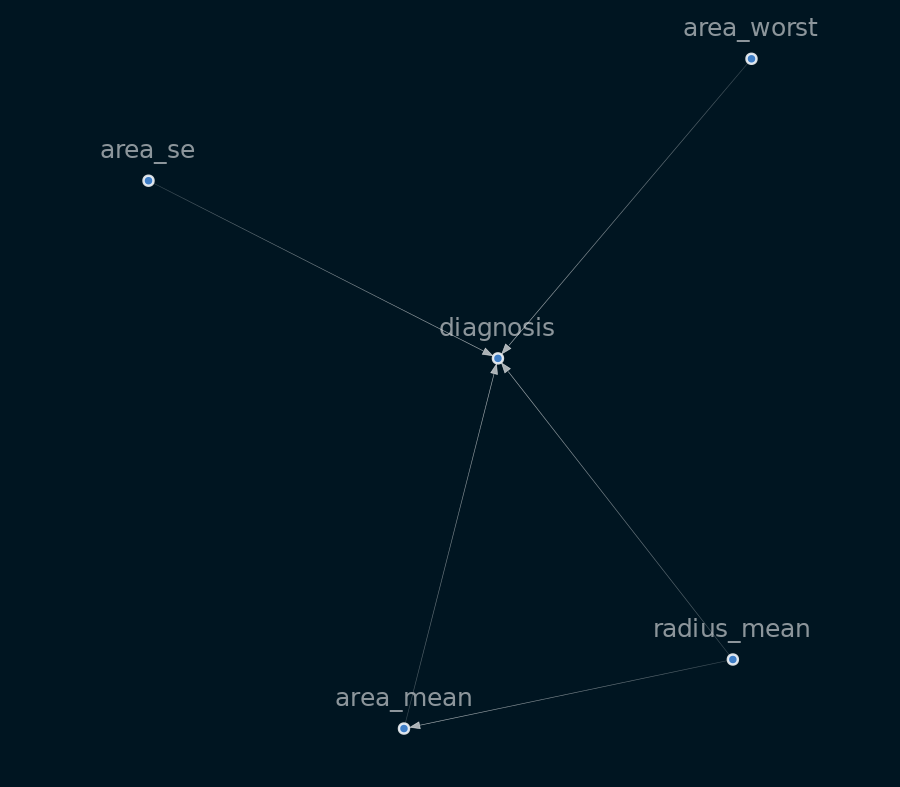

In [108]:
from causalnex.utils.network_utils import get_markov_blanket
bn = BayesianNetwork(new_sm)
blanket = get_markov_blanket(bn, 'diagnosis')
edge_list = list(blanket.structure.edges)
edge_list
vis_sm(blanket.structure)

In [2]:
bn = BayesianNetwork(new_sm)

NameError: ignored

In [3]:
bn = bn.fit_node_states(train_df)

NameError: ignored

In [1]:
bn = bn.fit_cpds(train_df, method="BayesianEstimator", bayes_prior="K2")

NameError: ignored